In [42]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets  # 数据集
from sklearn.datasets import make_classification  # 生成合成的分类数据集
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.linear_model import LogisticRegression  # 线性逻辑回归
from sklearn.metrics import mean_squared_error  # mse误差
from sklearn.model_selection import train_test_split  # 数据集划分
from sklearn.pipeline import Pipeline  # 管道 将多个数据处理步骤组合
from sklearn.preprocessing import PolynomialFeatures  # 多项式回归 多项式逻辑回归
from sklearn.preprocessing import StandardScaler  # 归一化处理
from sklearn.neighbors import KNeighborsClassifier # knn分类
from sklearn.model_selection import GridSearchCV # 超参数搜索
from sklearn.model_selection import cross_val_score # 交叉验证

from sklearn.linear_model import Lasso # lasso回归
from sklearn.linear_model import Ridge # 岭回归

from sklearn.metrics import confusion_matrix # 混淆矩阵
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve # pr曲线
from sklearn.metrics import roc_curve # roc曲线
from sklearn.metrics import roc_auc_score # auc值

warnings.filterwarnings("ignore")  # 抑制所有警告
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

# 决策边界

## 线性逻辑回归的决策边界

In [2]:
# 加载数据
x,y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0, # 冗余特征
    n_classes=2,
    n_clusters_per_class=1, # 每个类别中的簇（群集）数量
    random_state=1024)

# 分割数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=233,stratify=y)

# 逻辑回归
clf = LogisticRegression()
clf.fit(x_train,y_train) # 训练

LogisticRegression()

0.9357142857142857


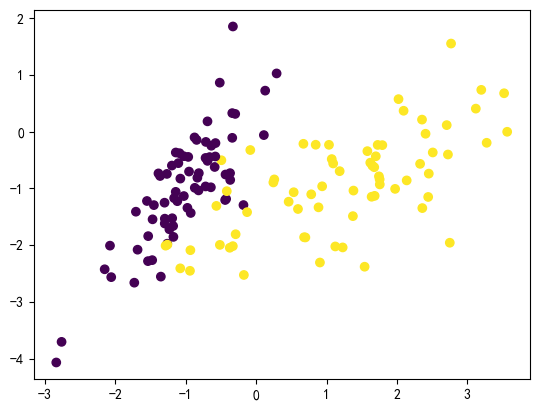

In [3]:
print(clf.score(x_train,y_train)) # 得分

# 可视化绘图
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [4]:
# 准备绘制决策边界
print(clf.coef_) # 权重参数
print(clf.intercept_) # 截距

[[ 3.03124615 -1.81280807]]
[-1.1307194]


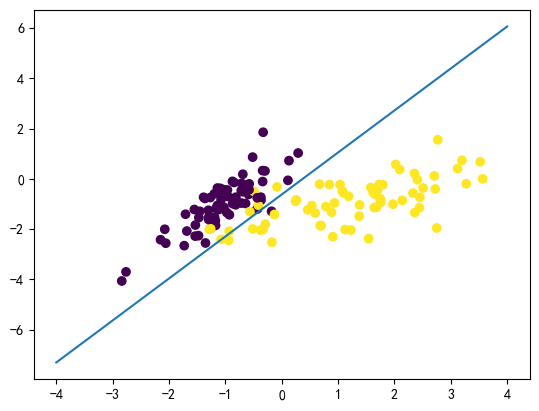

In [5]:
# 绘制决策边界
x1 = np.linspace(-4,4,1000)
x2 = (-clf.coef_[0][0]*x1 - clf.intercept_) / clf.coef_[0][1]

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.plot(x1,x2) # 决策边界 直线
plt.show()

In [6]:
# 决策边界绘制函数
def decision_boundary_plot(X, y, clf):
    axis_x1_min, axis_x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    axis_x2_min, axis_x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    x1, x2 = np.meshgrid( np.arange(axis_x1_min,axis_x1_max, 0.01) , np.arange(axis_x2_min,axis_x2_max, 0.01))
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])

    plt.contourf(x1, x2, z, cmap=custom_cmap)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

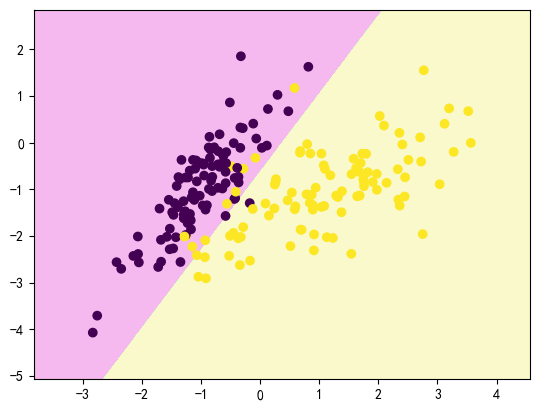

In [7]:
decision_boundary_plot(x, y, clf)

## 三分类的决策边界

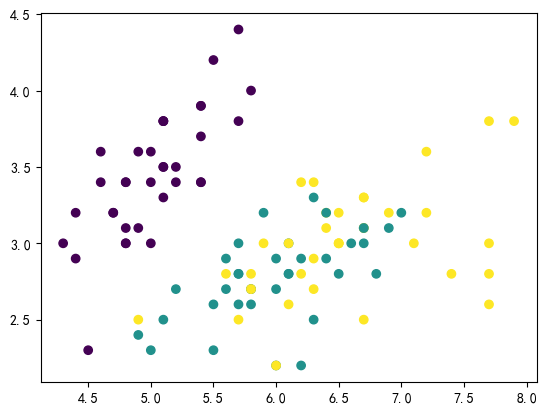

In [8]:
# 加载数据
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

# 分割数据
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=233,stratify=y)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [9]:
clf.fit(x_train, y_train)

LogisticRegression()

In [10]:
clf.score(x_test, y_test)

0.8666666666666667

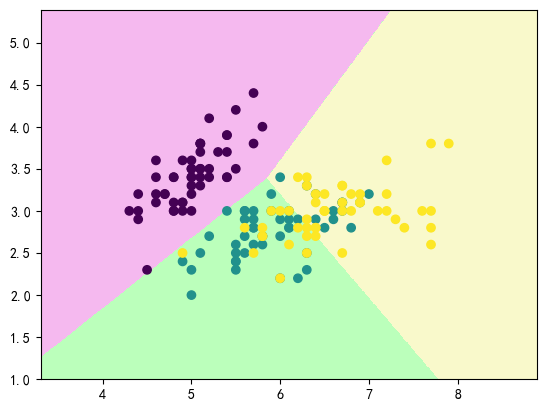

In [11]:
decision_boundary_plot(x, y, clf)

## 多项式回归的决策边界

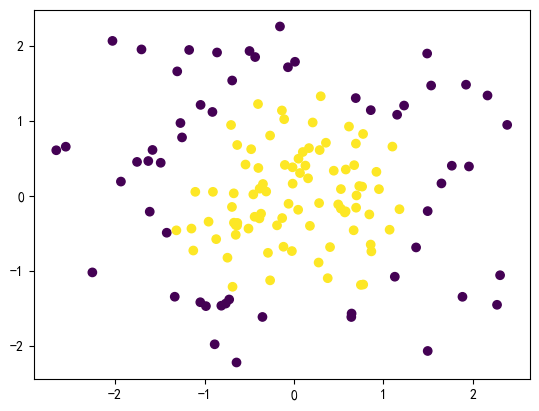

In [12]:
# 加载数据
np.random.seed(0)
X = np.random.normal(0,1,size=(200,2))
y = np.array((X[:,0]**2)+(X[:,1]**2) < 2, dtype='int') # True将被编码为1，False将被编码为0

# 分割数据
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=233,stratify=y) # 分层抽样stratify

plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

In [13]:
clf_pipe = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('log_reg',LogisticRegression())
])
clf_pipe.fit(x_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

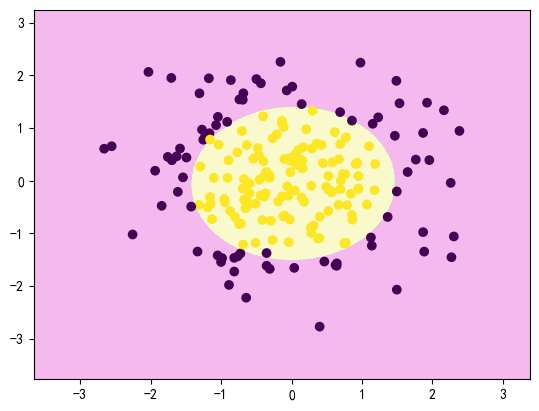

In [14]:
decision_boundary_plot(X, y, clf_pipe)

# 过拟合和欠拟合

## 欠拟合

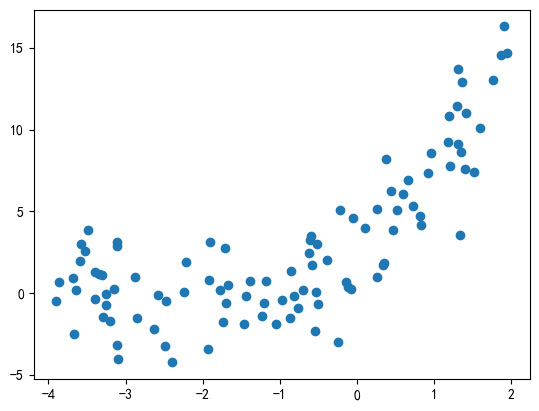

In [15]:
# 加载数据
np.random.seed(233)
x = np.random.uniform(-4,2,size=(100))
y = x**2 + 4*x + 3 + 2*np.random.randn(100)

# 数据的预处理
X = x.reshape(-1,1)

plt.scatter(x,y)
plt.show()

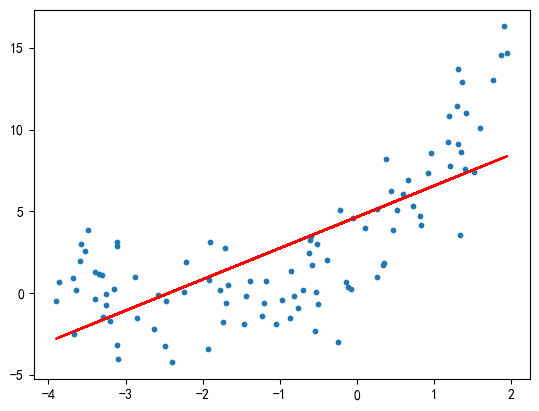

0.5273556058762796

In [16]:
# 线性回归
linear_regression = LinearRegression()
linear_regression.fit(X,y) # 训练

y_predict = linear_regression.predict(X) # 预测

plt.scatter(x,y,s=10)
plt.plot(x,y_predict,color='red')
plt.show() # 特征维度不足 模型复杂度较低 无法学习到数据的规律

linear_regression.score(X,y) # 得分很差

## 过拟合

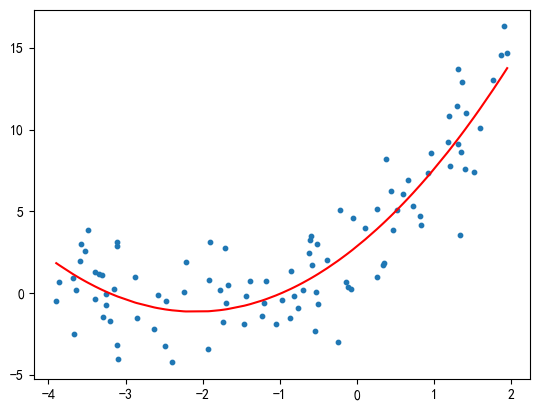

In [17]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

linear_regression = LinearRegression()
linear_regression.fit(X_poly,y)

y_predict = linear_regression.predict(X_poly)

plt.scatter(x,y,s=10)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='red')
plt.show()

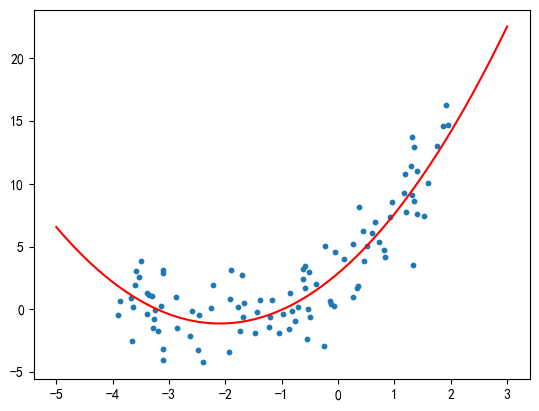

Degree:  2  ;Score:  0.7961121480231473


In [18]:
X_new = np.linspace(-5,3,200).reshape(-1,1) # 横轴范围可以自定义区间
X_new_poly = polynomial_features.fit_transform(X_new)
y_predict = linear_regression.predict(X_new_poly)

plt.scatter(x,y,s=10)
plt.plot(X_new,y_predict,color='red')
plt.show()

print('Degree: ',2,' ;Score: ',linear_regression.score(X_poly,y))

Degree:  2  ;Score:  0.7961121480231473
Degree:  5  ;Score:  0.802124730174001
Degree:  10  ;Score:  0.813336540732474
Degree:  15  ;Score:  0.8243702081976428
Degree:  20  ;Score:  0.8358688136099239
Degree:  24  ;Score:  0.8364717179790467


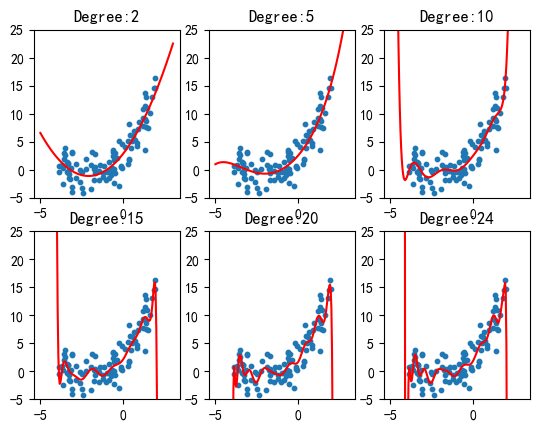

In [19]:
degrees = [2,5,10,15,20,24]

for i,degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    linear_regression = LinearRegression()
    linear_regression.fit(X_poly,y)

    X_new = np.linspace(-5,3,200).reshape(-1,1)
    X_new_poly = polynomial_features.fit_transform(X_new)
    y_predict = linear_regression.predict(X_new_poly)

    plt.subplot(2,3,i+1)
    plt.title('Degree:{0}'.format(degree))
    plt.scatter(x,y,s=10)
    plt.ylim(-5,25)
    plt.plot(X_new,y_predict,color='red')

    print('Degree: ',degree,' ;Score: ',linear_regression.score(X_poly,y))

plt.show()

Degree:  2  ;Score:  0.7961121480231473
Degree:  5  ;Score:  0.802124730174001
Degree:  10  ;Score:  0.813336540732474
Degree:  15  ;Score:  0.8243702081976428
Degree:  20  ;Score:  0.8358688136099239
Degree:  24  ;Score:  0.8364717179790467


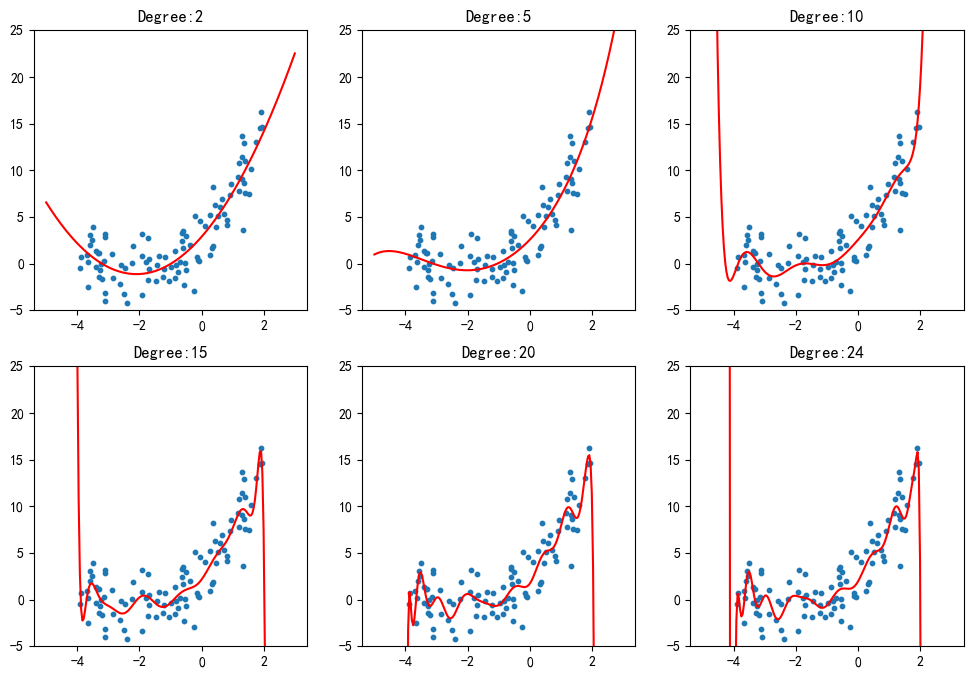

In [20]:
plt.rcParams['figure.figsize'] = (12,8)

degrees = [2,5,10,15,20,24]
for i,degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    linear_regression = LinearRegression()
    linear_regression.fit(X_poly,y)

    X_new = np.linspace(-5,3,200).reshape(-1,1)
    X_new_poly = polynomial_features.fit_transform(X_new)
    y_predict = linear_regression.predict(X_new_poly)

    plt.subplot(2,3,i+1) # 2行3列子图  当前子图位置i+1
    plt.title('Degree:{0}'.format(degree)) # 标题
    plt.scatter(x,y,s=10)
    plt.ylim(-5,25) # 控制显示范围
    plt.plot(X_new,y_predict,color='red')

    print('Degree: ',degree,' ;Score: ',linear_regression.score(X_poly,y))

plt.show()

# 评估拟合：学习曲线

## 加载数据

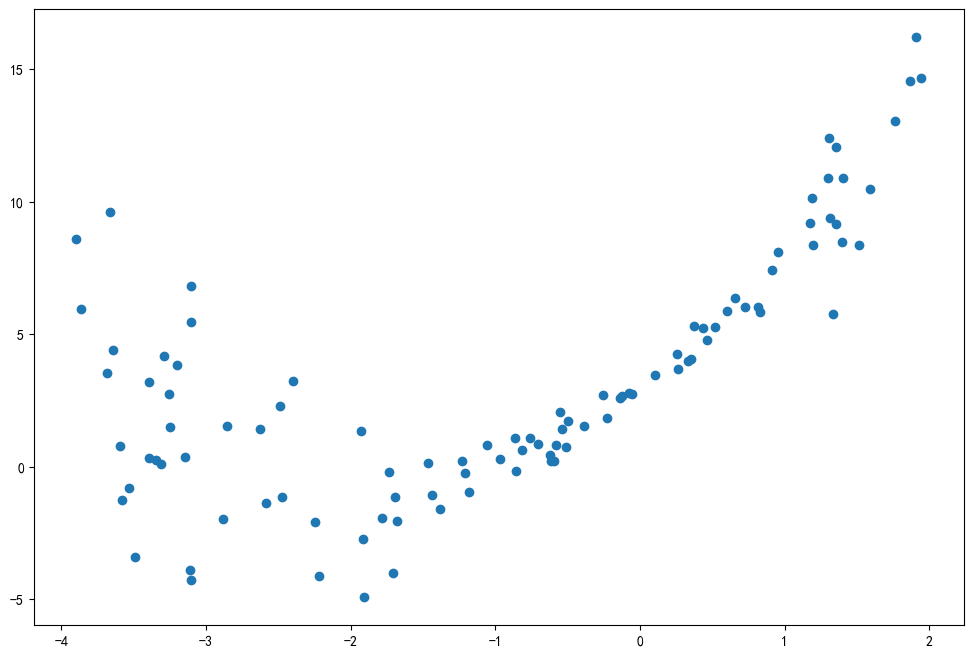

In [21]:
np.random.seed(233)
x = np.random.uniform(-4,2,size=(100))
y = x**2 + 4*x + 3 + x*np.random.randn(100)

X = x.reshape(-1,1)

plt.scatter(x,y)
plt.show()

## 线性回归和多项式回归

Degree:  1  ;Score:  0.39229311824901036
Degree:  2  ;Score:  0.8049072351970482
Degree:  5  ;Score:  0.812851527832153
Degree:  20  ;Score:  0.8681469265006543


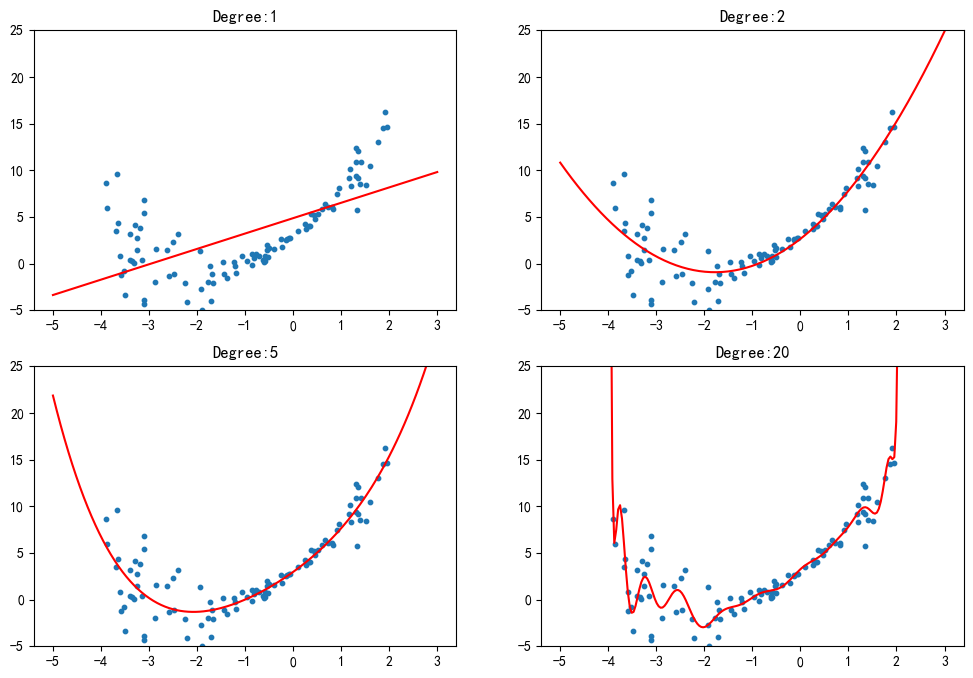

In [22]:
plt.rcParams['figure.figsize'] = (12,8)

degrees = [1,2,5,20]
for i,degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    linear_regression = LinearRegression()
    linear_regression.fit(X_poly,y)

    X_new = np.linspace(-5,3,200).reshape(-1,1)
    X_new_poly = polynomial_features.fit_transform(X_new)
    y_predict = linear_regression.predict(X_new_poly)

    plt.subplot(2,2,i+1) # 2行3列子图  当前子图位置i+1
    plt.title('Degree:{0}'.format(degree)) # 标题
    plt.scatter(x,y,s=10)
    plt.ylim(-5,25) # 控制显示范围
    plt.plot(X_new,y_predict,color='red')

    print('Degree: ',degree,' ;Score: ',linear_regression.score(X_poly,y))

plt.show()

In [23]:
# 学习曲线需要划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70,), (30,), (70,), (30,))

## 学习曲线

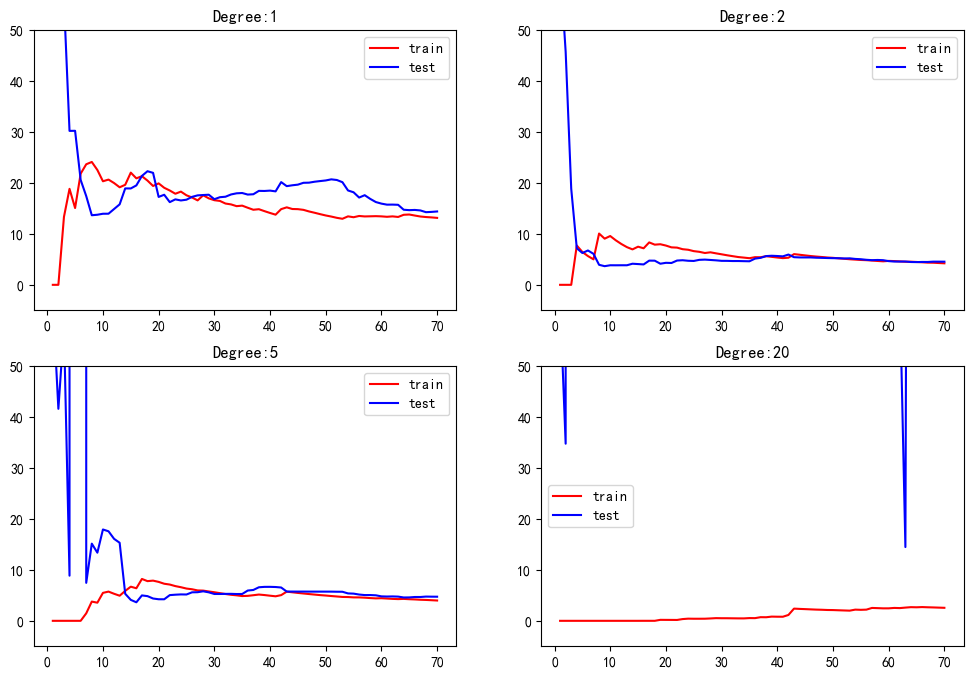

In [24]:
plt.rcParams['figure.figsize'] = (12,8)

degrees = [1,2,5,20]
for i,degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    
    X_poly_train = polynomial_features.fit_transform(x_train.reshape(-1,1))
    X_poly_test = polynomial_features.fit_transform(x_test.reshape(-1,1))

    train_error,test_error = [],[]
    for k in range(len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(X_poly_train[:k+1],y_train[:k+1])

        y_train_pred = linear_regression.predict(X_poly_train[:k+1])
        train_error.append(mean_squared_error(y_train[:k+1],y_train_pred)) # mse误差

        y_test_pred = linear_regression.predict(X_poly_test)
        test_error.append(mean_squared_error(y_test,y_test_pred))


    plt.subplot(2,2,i+1) # 2行3列子图  当前子图位置i+1
    plt.title('Degree:{0}'.format(degree)) # 标题
    plt.ylim(-5,50) # 控制显示范围
    plt.plot([k+1 for k in range(len(x_train))],train_error,color='red',label='train')
    plt.plot([k+1 for k in range(len(x_train))],test_error,color='blue',label='test')
    plt.legend()

plt.show()

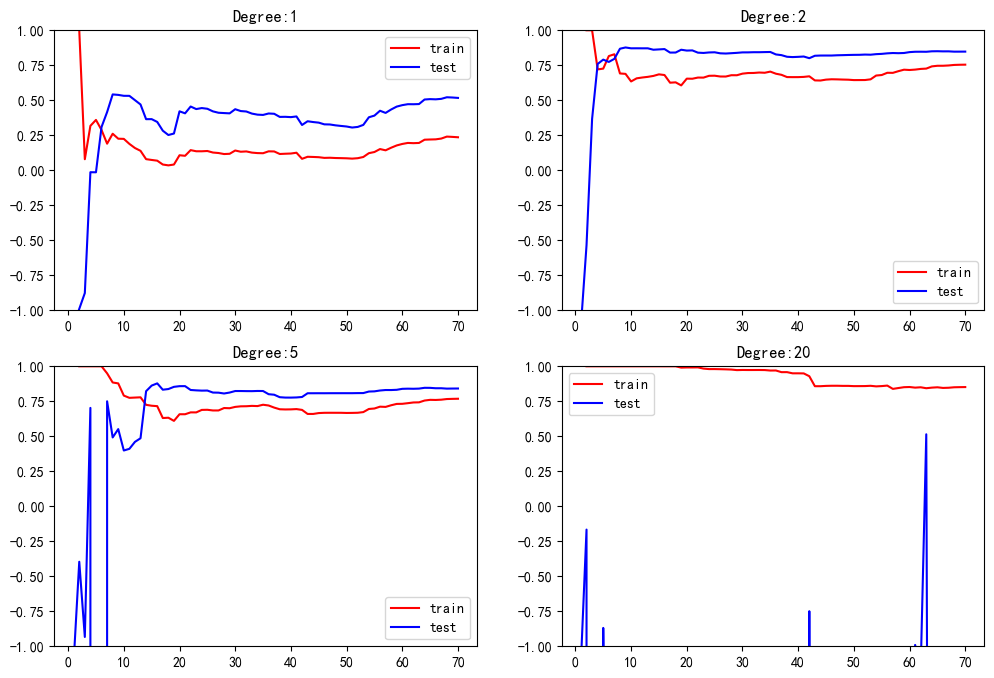

In [25]:
plt.rcParams['figure.figsize'] = (12,8)

degrees = [1,2,5,20]
for i,degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    
    X_poly_train = polynomial_features.fit_transform(x_train.reshape(-1,1))
    X_poly_test = polynomial_features.fit_transform(x_test.reshape(-1,1))

    train_error,test_error = [],[]
    for k in range(len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(X_poly_train[:k+1],y_train[:k+1])

        train_error.append(linear_regression.score(X_poly_train[:k+1],y_train[:k+1])) # r方误差
        test_error.append(linear_regression.score(X_poly_test,y_test))
        

    plt.subplot(2,2,i+1) # 2行3列子图  当前子图位置i+1
    plt.title('Degree:{0}'.format(degree)) # 标题
    plt.ylim(-1,1) # 控制显示范围
    plt.plot([k+1 for k in range(len(x_train))],train_error,color='red',label='train')
    plt.plot([k+1 for k in range(len(x_train))],test_error,color='blue',label='test')
    plt.legend()

plt.show()

# 交叉验证

## 加载数据集

In [26]:
# 加载数据
iris = datasets.load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## knn超参数搜索(手搓)

In [27]:
best_score = -1
best_n = -1 # n_neighbors最近点的个数
best_weight = '' # 选取点的权重weight(分类表决 加权分类表决)  uniform相同权重  distance距离越近权重越大
best_p = -1 # 闵可夫斯基距离的p

# 网页搜索：遍历所有超参数的可能性 选择准确率最高的
for n in range(1,20):
    for weight in ['uniform','distance']:
        for p in range(1,7):
            neigh = KNeighborsClassifier(n_neighbors=n,weights=weight,p=p)
            neigh.fit(x_train,y_train)
            score = neigh.score(x_test,y_test)
            
            if score > best_score:
                best_score = score
                best_n = n
                best_weight = weight
                best_p = p

print(f'n_neighbors: {best_n}')
print(f'weights: {best_weight}')
print(f'p: {best_p}')
print(f'score: {best_score}')

n_neighbors: 5
weights: uniform
p: 2
score: 1.0


## sklearn超参数搜索(自带cv)

In [28]:
# 参数字典
params = {'n_neighbors': [n for n in range(1,20)],
         'weights': ['uniform','distance'],
         'p': [p for p in range(1,7)]}

# 网页搜索
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, n_jobs=-1) # n_jobs GPU并行计算(不同参数间没什么关系)
grid.fit(x_train, y_train) # 训练

# 准确率计算不同导致的
print(grid.best_params_) # 弥补手搓缺陷  带有交叉验证cv
print(grid.best_score_)

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
0.961904761904762


## 交叉验证(弥补手搓的)

In [29]:
neigh = KNeighborsClassifier() # 默认参数的knn分类器
cv_scores = cross_val_score(neigh,x_train,y_train,cv=6) # 交叉验证  传入的训练样本随机分成6份 验证集
print(cv_scores)

[0.94444444 0.94444444 1.         0.82352941 0.88235294 1.        ]


In [30]:
# 改造手搓的knn超参数搜索
best_score = -1
best_n = -1 # n_neighbors最近点的个数
best_weight = '' # 选取点的权重weight(分类表决 加权分类表决)  uniform相同权重  distance距离越近权重越大
best_p = -1 # 闵可夫斯基距离的p
best_cv_scores = None # 交叉验证

# 网页搜索：遍历所有超参数的可能性 选择准确率最高的
for n in range(1,20):
    for weight in ['uniform','distance']:
        for p in range(1,7):
            neigh = KNeighborsClassifier(n_neighbors=n,weights=weight,p=p)
            # neigh.fit(x_train,y_train)
            # score = neigh.score(x_test,y_test)
            cv_scores = cross_val_score(neigh,x_train,y_train,cv=5)
            score = np.mean(cv_scores)
            
            if score > best_score:
                best_score = score
                best_n = n
                best_weight = weight
                best_p = p
                best_cv_scores = cv_scores

print(f'n_neighbors: {best_n}')
print(f'weights: {best_weight}')
print(f'p: {best_p}')
print(f'score: {best_score}')
print(f'best_cv_score: {best_cv_scores}')

n_neighbors: 9
weights: uniform
p: 2
score: 0.961904761904762
best_cv_score: [1.         1.         0.95238095 0.85714286 1.        ]


# 正则化

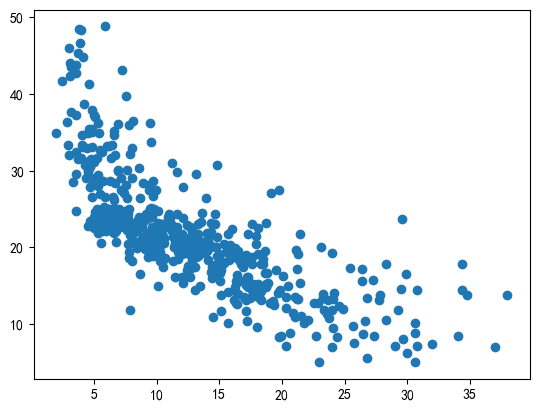

In [31]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

# 加载数据集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

x = data[:,12] # 只选择一个特征
y = target

x = x[y<50]
y = y[y<50]

plt.scatter(x,y)
plt.show()

In [32]:
# 分割数据集
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y)

## 多项式回归

819121.8025583389


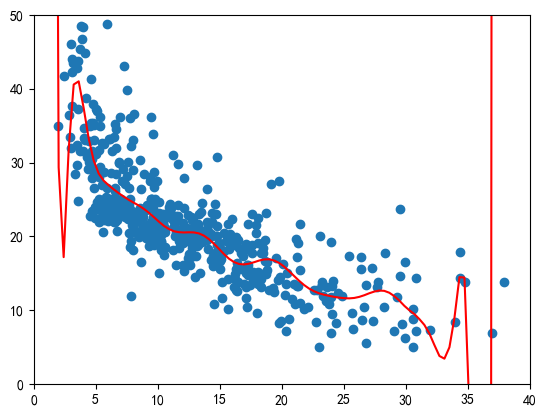

In [33]:
def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train,y_train)

y_predict = poly_reg.predict(X_test)
print(mean_squared_error(y_test,y_predict)) # 极大的均方误差  模型出现过拟合


def show_plot(model):
    plt.scatter(x,y)
    X_plot = np.linspace(0,40,100).reshape(100,1) # 生成一组用于绘制拟合曲线的数据点
    y_plot = model.predict(X_plot) # 使用模型对生成的数据点进行预测，得到预测的y值
    plt.plot(X_plot[:,0],y_plot,color='red')# 绘制拟合曲线，使用红色线条
    plt.axis([0,40,0,50]) # 【模型坐标范围】
    plt.show()

show_plot(poly_reg)

## LASSO回归

22.29958112184851


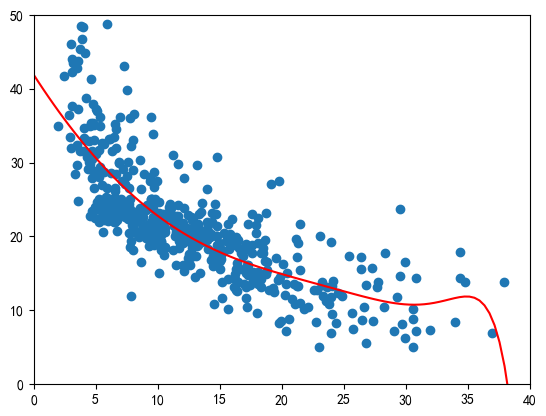

In [34]:
def LassoRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lasso_reg',Lasso(alpha=alpha))
    ])

lasso_reg = LassoRegression(20,0.01) # alpha过大 会使得特征参数衰减为0 变成直线  - 欠拟合
lasso_reg.fit(X_train,y_train)

y_predict = lasso_reg.predict(X_test)
print(mean_squared_error(y_test,y_predict))

show_plot(lasso_reg)

0.1
27.486314377105984


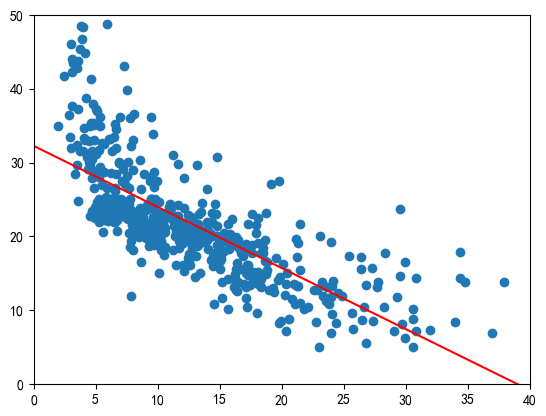

In [35]:
# 超参数搜索???
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error') # 均方误差的负值
grid_search.fit(X_train, y_train)  

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(best_alpha)
print(mean_squared_error(y_test,best_model.predict(X_test)))
show_plot(best_model)

## 岭回归

24.12463779012121


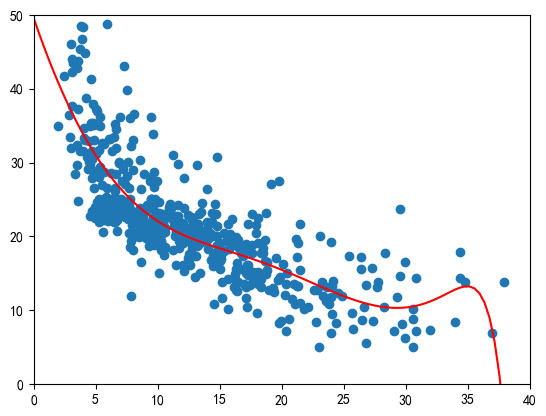

In [36]:
def RidgeRegression(degree,alpha):
    return Pipeline([
        ('ploy',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])

ridge_reg = RidgeRegression(20,0.01) # 岭回归会将权重衰减到很小的值 但是不会到零 不会变成直线
ridge_reg.fit(X_train,y_train)

y_predict = ridge_reg.predict(X_test)
print(mean_squared_error(y_test,y_predict))

show_plot(ridge_reg)

100
27.50248397416088


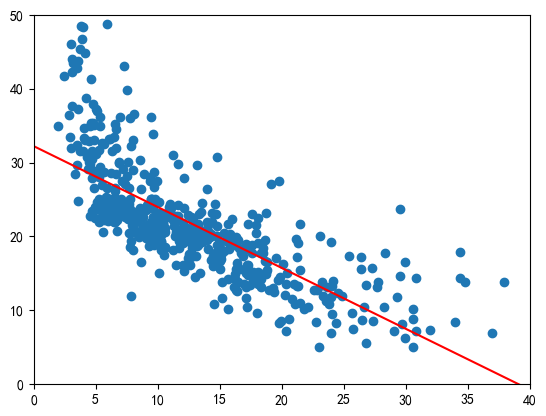

In [37]:
# 超参数搜索???
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error') # 均方误差的负值
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(best_alpha)
print(mean_squared_error(y_test,best_model.predict(X_test)))
show_plot(best_model)

# 模型评价

In [38]:
# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target.copy()
print(y)

y[y!=0] = 1 # 合并2和3
print(y)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_predict = logistic_reg.predict(X_test)

print(y_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 1]
[1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 1]


## 自己实现confusion_matrix、precision、recall

In [39]:
TP = np.sum((y_predict==1)&(y_test==1))
FN = np.sum((y_predict==0)&(y_test==1)) # 漏网之鱼
TN = np.sum((y_predict==0)&(y_test==0))
FP = np.sum((y_predict==1)&(y_test==0)) # 冤枉好人

print(TP)
print(FN)
print(TN)
print(FP)

confusion_matrix = np.array([
    [TP,FP],
    [FN,TN]
])
print(confusion_matrix)

precision = TP / (TP+FP) # 冤枉好人
recall = TP / (TP+FN) # 漏网之鱼
f1_score = 2*precision*recall / (precision+recall)
print(precision)
print(recall)
print(f1_score)

28
0
10
0
[[28  0]
 [ 0 10]]
1.0
1.0
1.0


## 调库sklearn实现

In [40]:
# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target.copy()
print(y)

y[y!=0] = 1 # 合并2和3
print(y)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_predict = logistic_reg.predict(X_test)

print(y_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 1]
[1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 1]


In [43]:
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

[[10  0]
 [ 0 28]]
1.0
1.0
1.0


## 自己实现PR曲线

In [44]:
iris = datasets.load_iris()
X = iris.data
y = iris.target.copy()

y[y!=0] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_predict = logistic_reg.predict(X_test)
print(y_predict)

decision_scores = logistic_reg.decision_function(X_test) # 决策分数(可改变阈值)  这个分数用来表示模型对于该样本属于正类别的置信程度
print(decision_scores)

precision_scores = []
recall_scores = []
thresholds = np.sort(decision_scores) # 排序
for threshold in thresholds: # 选定不同的阈值
    y_predict = np.array(decision_scores>=threshold,dtype='int') # 大于等于阈值分类为1 小于阈值的分类为0
    precision_scores.append(precision_score(y_test,y_predict))
    recall_scores.append(recall_score(y_test,y_predict))

[1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 1]
[ 4.52754708  6.87819785  1.76626704  6.52382721 -3.69894208  3.62432582
  4.56308405  6.90953592  5.03259757  4.32814348  4.65190775 -3.4406931
 -3.38774403 -3.39770458  9.14447268  3.55687964 -5.19861539  8.64268233
  7.05727385  7.23922648  5.13145067 -3.75815509 11.76549329 -3.89461019
  4.27746243  4.01246718 -4.24926017  3.78780538  8.75298289  9.69297511
 -4.01158816 -3.69589243  3.69030453  7.14112807  1.0819265   5.36425737
  7.39993573 10.56300377]


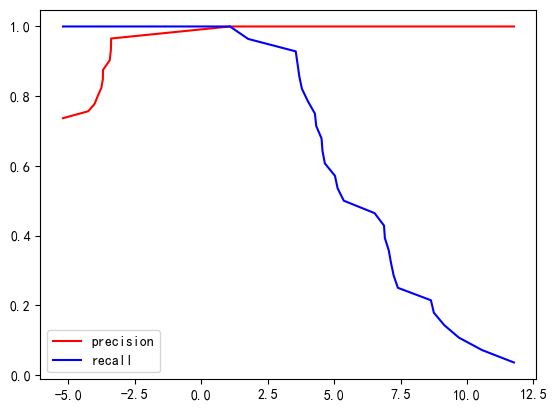

In [45]:
# 横轴为不同阈值的取值情况 纵轴为不同的取值
plt.plot(thresholds,precision_scores,color='r',label='precision')
plt.plot(thresholds,recall_scores,color='b',label='recall')
plt.legend()
plt.show() # 随着阈值的增大 precision增大 recall减小

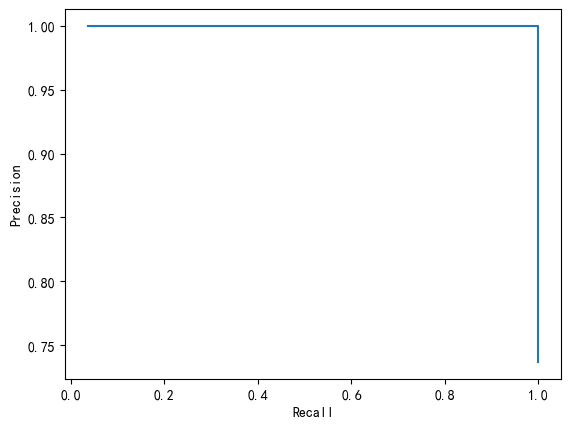

In [46]:
# 横轴是recall  纵轴是precision
plt.plot(recall_scores,precision_scores)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## sklearn调库实现绘制

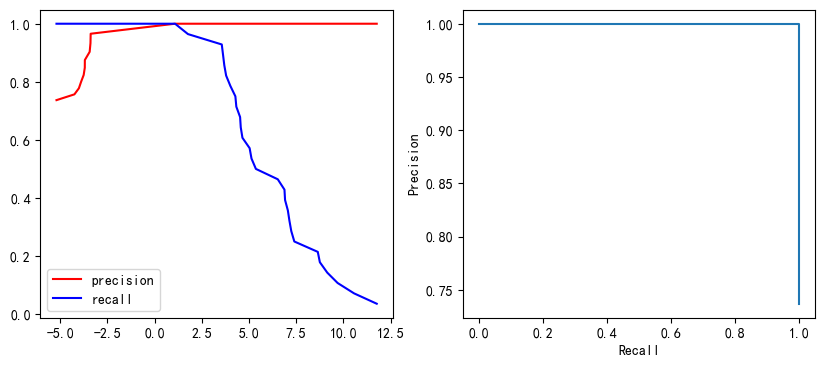

In [47]:
precision_scores,recall_scores,thresholds = precision_recall_curve(y_test,decision_scores)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(thresholds,precision_scores[:-1],color='r',label='precision') # precision_scores 多一个1
axes[0].plot(thresholds,recall_scores[:-1],color='b',label='recall') # recall_scores 多一个0
axes[0].legend()

axes[1].plot(recall_scores,precision_scores)
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

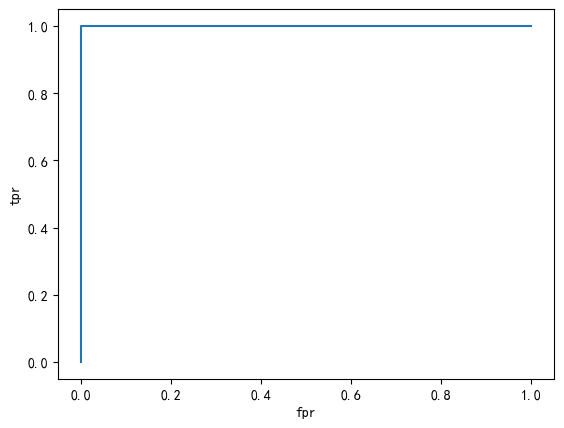

1.0


In [48]:
fpr,tpr,thresholds = roc_curve(y_test,decision_scores)

# roc曲线  横纵是fpr 纵轴是tpr
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

auc = roc_auc_score(y_test,decision_scores)
print(auc)